In [1]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


C:\Users\kater\AppData\Local\Temp\ipykernel_18512\651874018.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [76]:
## Getting train data

titanic_train = pd.read_csv('train_6.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PREPROCESSING

In [78]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
## Data Cleaning
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
## To identify rows in the DataFrame where at least one value is missing (NaN/null) across any column
titanic_train[titanic_train.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [81]:
## to correct missing values REMOVING NULL VALUES
# Drop rows with missing values in Cabin columns
titanic_train = titanic_train.dropna(subset=['Cabin'])


In [82]:
## Finding mean/median/mode in AGE
# Assuming 'Age' column has some missing values

# Median
median_age = titanic_train['Age'].median()

# Mode
mode_age = titanic_train['Age'].mode()

# Mean (Note: Be cautious with mean if there are outliers in the data)
mean_age = titanic_train['Age'].mean()

# If there are multiple modes, convert to a list
mode_age_list = mode_age.tolist()

print("Median Age:", median_age)
print("Mode Age:", mode_age_list)
print("Mean Age:", mean_age)


Median Age: 36.0
Mode Age: [36.0]
Mean Age: 35.829297297297295


In [83]:
# Identify rows with missing values in the "Age" column
missing_rows = titanic_train[titanic_train['Age'].isnull()]
missing_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S


In [84]:

# Replace NaN values in 'Age' column with 36
titanic_train.loc[pd.isnull(titanic_train['Age']), 'Age'] = 36

In [85]:
print(titanic_train['Age'])

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 204, dtype: float64


In [86]:
# Replace NaN values in 'Embarked' column with 'S'
titanic_train['Embarked'].fillna('S', inplace=True)

C:\Users\kater\AppData\Local\Temp\ipykernel_9720\79532150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Embarked'].fillna('S', inplace=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_9720\79532150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Embarked'].fillna('S', inplace=True)


In [87]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [88]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [89]:
## How many types of diffenent valies in each column
unique_values = titanic_train.nunique()
print(unique_values)


PassengerId    204
Survived         2
Pclass           3
Name           204
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         142
Fare           100
Cabin          147
Embarked         3
dtype: int64


In [90]:
## Checking for the actual values in the columns
unique_values = titanic_train.apply(lambda x: x.unique())
print(unique_values)


PassengerId    [2, 4, 7, 11, 12, 22, 24, 28, 32, 53, 55, 56, ...
Survived                                                  [1, 0]
Pclass                                                 [1, 3, 2]
Name           [Cumings, Mrs. John Bradley (Florence Briggs T...
Sex                                               [female, male]
Age            [38.0, 35.0, 54.0, 4.0, 58.0, 34.0, 28.0, 19.0...
SibSp                                               [1, 0, 3, 2]
Parch                                               [0, 1, 2, 4]
Ticket         [PC 17599, 113803, 17463, PP 9549, 113783, 248...
Fare           [71.2833, 53.1, 51.8625, 16.7, 26.55, 13.0, 35...
Cabin          [C85, C123, E46, G6, C103, D56, A6, C23 C25 C2...
Embarked                                               [C, S, Q]
dtype: object


In [91]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [92]:
### Create new feature - FAMILY SIZE


# Assuming df is your DataFrame

# Define a function to create the 'Family' feature
def create_family_feature(row):
    # Sum the SibSp and Parch columns to get the total family size
    family_size = row['SibSp'] + row['Parch']
    return family_size

# Apply the function to create the 'Family' feature
titanic_train['Family'] = titanic_train.apply(create_family_feature, axis=1)

# Display the DataFrame with the new 'Family' feature
titanic_train.head()



C:\Users\kater\AppData\Local\Temp\ipykernel_9720\470500266.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Family'] = titanic_train.apply(create_family_feature, axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [93]:

# Remove the 'PassengerId','Name', 'SibSp', 'Parch' and 'Ticket' columns
titanic_train.drop(['PassengerId','Name', 'SibSp', 'Parch','Ticket'], axis=1, inplace=True)


C:\Users\kater\AppData\Local\Temp\ipykernel_9720\263873591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.drop(['PassengerId','Name', 'SibSp', 'Parch','Ticket'], axis=1, inplace=True)


In [94]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
1,1,1,female,38.0,71.2833,C85,C,1
3,1,1,female,35.0,53.1000,C123,S,1
6,0,1,male,54.0,51.8625,E46,S,0
10,1,3,female,4.0,16.7000,G6,S,2
11,1,1,female,58.0,26.5500,C103,S,0


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Family'}>, <Axes: >]], dtype=object)

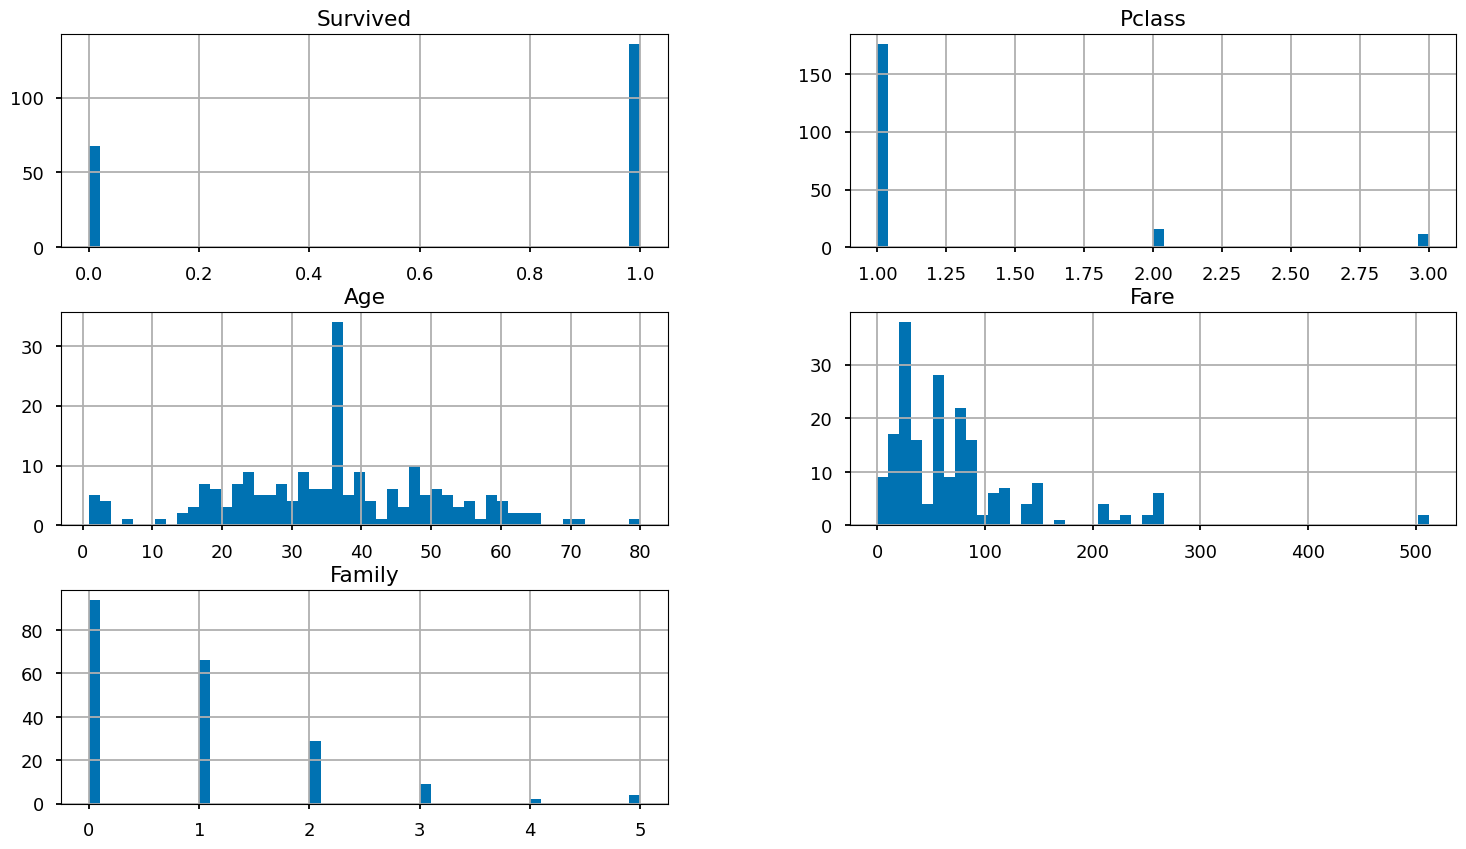

In [95]:
## Histogram for all features

# for papers
plt.style.use('seaborn-v0_8-paper')
# for presentations
plt.style.use('seaborn-v0_8-talk')
# for papers with colors distinguishable by colorblind people
plt.style.use('seaborn-v0_8-colorblind')
# HACK: for presentations with colors distinguishable by colorblind people
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-talk'])

# Your histogram plotting code here
titanic_train.hist(bins=50, figsize=(18, 10))

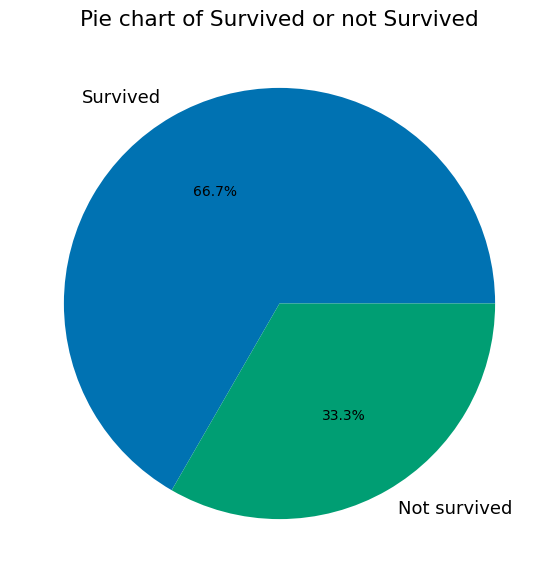

In [96]:
##Pie chart in percentage Survived vs not
percentage = titanic_train['Survived'].value_counts(normalize=True)*100
classlabels =['Survived','Not survived']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels= classlabels, autopct='%1.1f%%')
plt.title('Pie chart of Survived or not Survived')
plt.show()


In [97]:
# Calculate correlation between 'Survived' and 'Family'
correlation = titanic_train['Survived'].corr(titanic_train['Family'])
print(correlation)

0.10270452257788538


In [98]:
##### ENCODING!!!!!
# Encode categorical variables. Mapping 'Sex' and 'Embarked' into numerical
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\kater\AppData\Local\Temp\ipykernel_9720\3198350889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
C:\Users\kater\AppData\Local\Temp\ipykernel_9720\3198350889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [99]:

# Feature Engineering - Cabin
##titanic_train['Deck'] = titanic_train['Cabin'].str[:1]  # Extract first letter of Cabin to get the deck

## use .astype(str) to convert the 'Cabin' column to strings, ensuring that all values are treated as strings.
# Convert 'Cabin' column to strings and extract the first character
# Then, we use .str[0] to extract the first character from each string in the 'Cabin' column.
titanic_train['Cabin'] = titanic_train['Cabin'].astype(str).str[0]

## we map the extracted first characters to numerical values using the cabin_mapping dictionary.
# Map the first character of 'Cabin' to numerical values
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
titanic_train['Cabin'] = titanic_train['Cabin'].map(cabin_mapping)

C:\Users\kater\AppData\Local\Temp\ipykernel_9720\1147428529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Cabin'] = titanic_train['Cabin'].astype(str).str[0]
C:\Users\kater\AppData\Local\Temp\ipykernel_9720\1147428529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Cabin'] = titanic_train['Cabin'].map(cabin_mapping)


In [100]:
## Check for dtypes
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  204 non-null    int64  
 1   Pclass    204 non-null    int64  
 2   Sex       204 non-null    int64  
 3   Age       204 non-null    float64
 4   Fare      204 non-null    float64
 5   Cabin     204 non-null    int64  
 6   Embarked  204 non-null    int64  
 7   Family    204 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 14.3 KB


<Axes: >

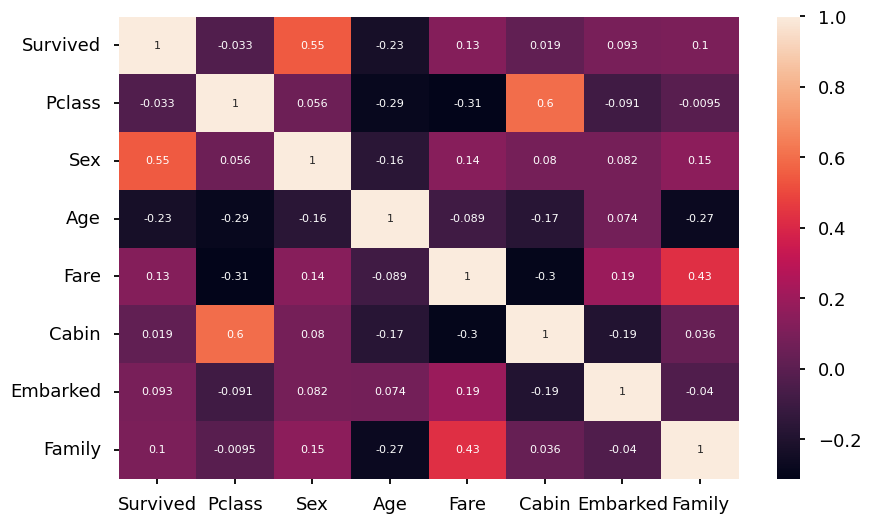

In [101]:
## Correlation
# Calculate the correlation matrix
corr_matrix = titanic_train.corr()

plt.figure(figsize=(10,6))
sns.heatmap(titanic_train.corr(), annot=True, annot_kws={'size': 8})

<Figure size 300x100 with 0 Axes>

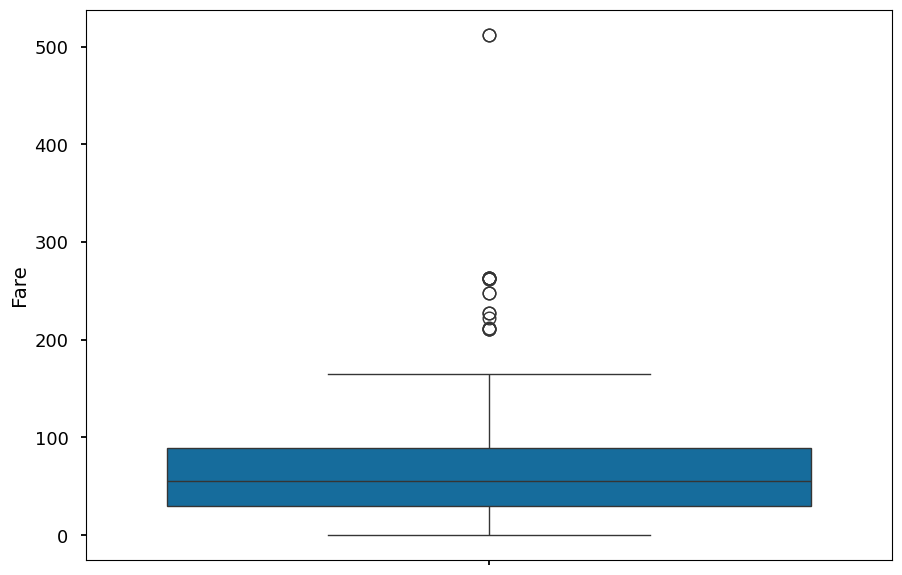

<Figure size 300x100 with 0 Axes>

In [102]:
## Outliers in Fare
sns.boxplot(titanic_train['Fare'])
plt.figure(figsize=(3, 1))

In [103]:
## SibSP has been dropped
##sns.boxplot(titanic_train['SibSp'])
##plt.figure(figsize=(3, 1))

In [104]:
## Parch has been dropped
##sns.boxplot(titanic_train['Parch'])
##plt.figure(figsize=(10, 6))

In [105]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
1,1,1,1,38.0,71.2833,2,1,1
3,1,1,1,35.0,53.1000,2,0,1
6,0,1,0,54.0,51.8625,4,0,0
10,1,3,1,4.0,16.7000,6,0,2
11,1,1,1,58.0,26.5500,2,0,0


INDEPENDENT FEATURE SELECTION

In [106]:
########################################################################

###Recursive Feature Elimination (RFE) method:

# Feature Selection
# Create a Logistic Regression model
model = LogisticRegression()

# Use RFE to select the best features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(titanic_train.drop('Survived', axis=1), titanic_train['Survived'])

####################################################################
# Get the selected features
selected_features = rfe.get_support()
selected_feature_names = titanic_train.drop('Survived', axis=1).columns[selected_features]

# Print the selected features along with their names
print("Selected features:")
for feature_name, selected in zip(titanic_train.drop('Survived', axis=1).columns, selected_features):
    print(feature_name, ": ", selected)


#########################################################################


# Print the selected features
###print("Selected features: ", rfe.get_support())

# Model Building and Evaluation
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived', axis=1), titanic_train['Survived'], test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Selected features:
Pclass :  True
Sex :  True
Age :  False
Fare :  False
Cabin :  True
Embarked :  True
Family :  True
Accuracy:  0.8536585365853658
Precision:  0.9
Recall:  0.9
F1 Score:  0.9


c:\Users\kater\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kater\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [107]:
###############################################################################################
## RANDOM TREE

# Feature selection using Random Forest
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X, y)

importance = forest.feature_importances_

# Create a dataframe for feature importance
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
df_importance = df_importance.sort_values('Importance', ascending=False)
print(df_importance)

# Model building and evaluation with Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

    Feature  Importance
2       Age    0.267298
3      Fare    0.258978
1       Sex    0.254673
4     Cabin    0.101096
6    Family    0.065726
5  Embarked    0.034253
0    Pclass    0.017976
Accuracy: 0.7073170731707317
Precision: 0.7419354838709677
Recall: 0.8518518518518519
F1 Score: 0.7931034482758621


In [108]:
################################################################################
## DECISON TREE


# Define the feature columns
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family']

# Define the target column
target_col = 'Survived'


# Perform feature selection using Decision Tree
##from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model on the train dataset
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(titanic_train[feature_cols], titanic_train[target_col])

# Extract the feature importances
importances = tree_model.feature_importances_

# Print the feature importances
for feature, importance in zip(feature_cols, importances):
    print(f"{feature}: {importance}")

# Perform model building and evaluation using Decision Tree
##from sklearn.model_selection import train_test_split
##from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the train dataset into the train and validation datasets
train_X, val_X, train_y, val_y = train_test_split(titanic_train[feature_cols], titanic_train[target_col], test_size=0.2, random_state=0)

# Train a Decision Tree model on the train dataset
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(train_X, train_y)

# Evaluate the model on the validation dataset
val_pred = tree_model.predict(val_X)

# Calculate the accuracy, precision, recall, and F1 score
val_accuracy = accuracy_score(val_y, val_pred)
val_precision = precision_score(val_y, val_pred)
val_recall = recall_score(val_y, val_pred)
val_f1_score = f1_score(val_y, val_pred)

Pclass: 0.0
Sex: 0.30065516909143436
Age: 0.3564392424027072
Fare: 0.2425764886103394
Cabin: 0.06610319827231587
Embarked: 0.0
Family: 0.03422590162320307


In [109]:
print("Accuracy:", accuracy_score(val_y, val_pred))
print("Precision:", precision_score(val_y, val_pred))
print("Recall:", recall_score(val_y, val_pred))
print("F1 score:", f1_score(val_y, val_pred))

Accuracy: 0.6585365853658537
Precision: 0.782608695652174
Recall: 0.6666666666666666
F1 score: 0.72


In [110]:
## Define DEPENDEND AND INDEPENDENT FEATURES

## select the needed data points for independent and dependent variables
##data.iloc[:, 3]: This part of the code selects all rows (:) from the DataFrame data and the 4th column (index 3) using integer-based indexing with .iloc[]. 
##This operation extracts a one-dimensional array (technically a pandas Series) containing the values from the specified column.

X = titanic_train.iloc[:, 1:] ## .values.reshape(-1,1) ## -INDEPENDENT FEATURE as TWO dimensional
# Define X features (all columns except 'Survived')

y = titanic_train.iloc[:, 0] ## Independent feature SURVIVED


In [111]:
X

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
1,1,1,38.0,71.2833,2,1,1
3,1,1,35.0,53.1000,2,0,1
6,1,0,54.0,51.8625,4,0,0
10,3,1,4.0,16.7000,6,0,2
11,1,1,58.0,26.5500,2,0,0
...,...,...,...,...,...,...,...
871,1,1,47.0,52.5542,3,0,2
872,1,0,33.0,5.0000,1,0,0
879,1,1,56.0,83.1583,2,1,1
887,1,1,19.0,30.0000,1,0,0


In [112]:
## TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
## Standardisation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.37907668,  1.08320512,  0.7738545 , ...,  0.4362997 ,
        -0.69356052,  1.08803293],
       [-0.37907668, -0.92318618, -0.57896467, ..., -0.25415516,
        -0.69356052, -0.79866247],
       [-0.37907668,  1.08320512,  0.56025147, ..., -0.94461002,
         1.19061222, -0.79866247],
       ...,
       [ 3.48276701, -0.92318618, -0.29416063, ...,  1.12675455,
        -0.69356052, -0.79866247],
       [ 3.48276701, -0.92318618, -0.0093566 , ...,  1.81720941,
         3.07478495, -0.79866247],
       [-0.37907668,  1.08320512, -0.0093566 , ...,  0.4362997 ,
        -0.69356052,  0.14468523]])

In [114]:
## Logistic Regression
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

In [115]:
## Cross Validation
# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean accuracy of cross-validation scores
mean_cv_accuracy = cv_scores.mean()
print("Mean Cross-validation accuracy:", mean_cv_accuracy)

Cross-validation scores: [0.6969697  0.72727273 0.72727273 0.875      0.59375   ]
Mean Cross-validation accuracy: 0.7240530303030303


In [116]:
# Step 8: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.90      0.95        30

    accuracy                           0.93        41
   macro avg       0.89      0.95      0.91        41
weighted avg       0.94      0.93      0.93        41



In [117]:

# Step 8: Evaluate Model
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.93
Precision: 1.00
Recall: 0.90
F1 Score: 0.95


Accuracy: 0.926829268292683
Confusion Matrix: 
[[11  0]
 [ 3 27]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.90      0.95        30

    accuracy                           0.93        41
   macro avg       0.89      0.95      0.91        41
weighted avg       0.94      0.93      0.93        41



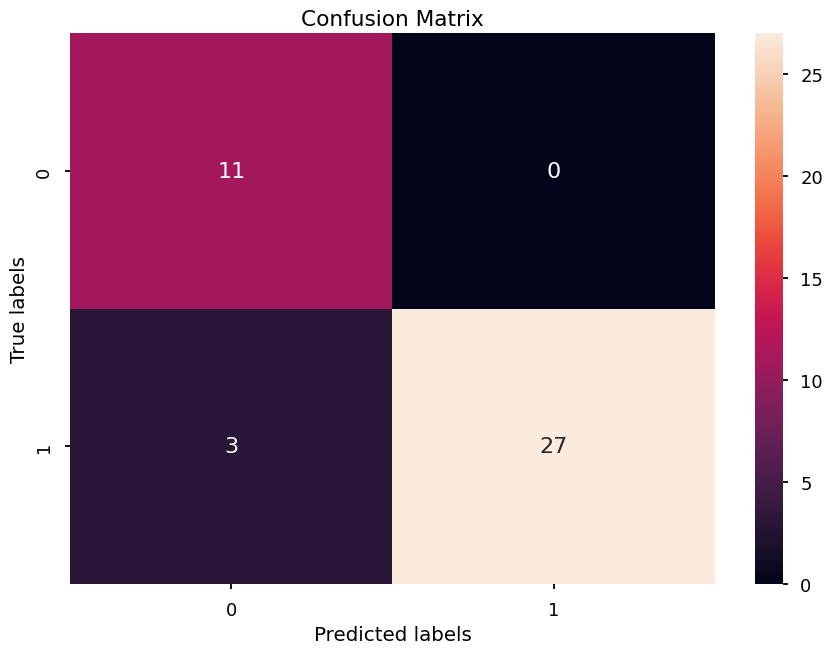

C:\Users\kater\AppData\Local\Temp\ipykernel_9720\584308669.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


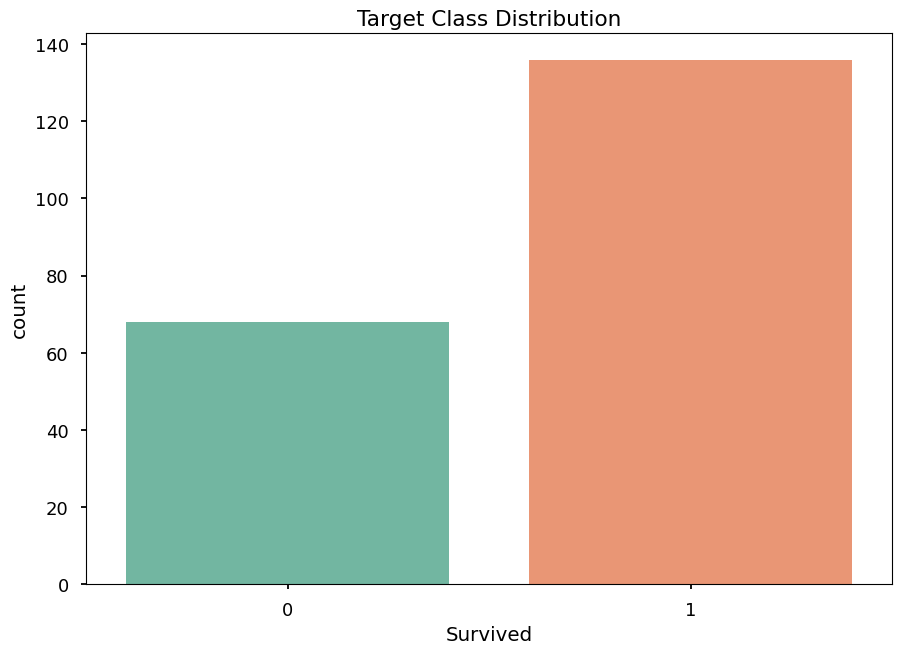

In [118]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{confusion}')
print(f'Classification Report: \n{report}')

# Visualize the results (optional)
sns.heatmap(confusion, annot=True, fmt='d',annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

sns.countplot(x=y, palette='Set2')
plt.title('Target Class Distribution')
plt.show()

In [119]:
titanic_train.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
1,1,1,1,38.0,71.2833,2,1,1
3,1,1,1,35.0,53.1000,2,0,1
6,0,1,0,54.0,51.8625,4,0,0
10,1,3,1,4.0,16.7000,6,0,2
11,1,1,1,58.0,26.5500,2,0,0


In [120]:
titanic_train.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.666667,1.196078,0.475490,35.845196,76.141504,2.392157,0.377451,0.877451
std,0.472564,0.525961,0.500627,14.927653,74.391749,1.476628,0.524927,1.082636
min,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,25.000000,29.453125,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,36.000000,55.220850,2.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,47.000000,89.328150,3.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,7.000000,2.000000,5.000000


TEST DATA

In [121]:
## Getting train data
titanic_test = pd.read_csv('test_6.csv')
titanic_test
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [122]:
## Data Cleaning
titanic_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [123]:
## To identify rows in the DataFrame where at least one value is missing (NaN/null) across any column
titanic_test[titanic_test.isnull().any(axis = 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [124]:
# Identify rows with missing values in the "Age" column
missing_rows = titanic_test[titanic_test['Fare'].isnull()]
missing_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [125]:
## to correct missing values REMOVING NULL VALUES
# Drop rows with missing values in Cabin columns
titanic_test = titanic_test.dropna(subset=['Cabin'])

In [126]:
## Finding mean/median/mode in AGE
# Assuming 'Age' column has some missing values

# Median
median_age = titanic_test['Age'].median()

# Mode
mode_age = titanic_test['Age'].mode()

# Mean (Note: Be cautious with mean if there are outliers in the data)
mean_age = titanic_test['Age'].mean()

# If there are multiple modes, convert to a list
mode_age_list = mode_age.tolist()

print("Median Age:", median_age)
print("Mode Age:", mode_age_list)
print("Mean Age:", mean_age)

Median Age: 39.0
Mode Age: [30.0, 36.0, 45.0, 48.0, 55.0]
Mean Age: 39.247126436781606


In [127]:
# Replace NaN values in 'Age' column with 36
titanic_test.loc[pd.isnull(titanic_test['Age']), 'Age'] = 39

In [128]:
## Data Cleaning
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [129]:
## How many types of diffenent valies in each column
unique_values = titanic_test.nunique()
print(unique_values)

PassengerId    91
Pclass          3
Name           91
Sex             2
Age            46
SibSp           4
Parch           5
Ticket         70
Fare           59
Cabin          76
Embarked        3
dtype: int64


In [130]:
## Checking for the actual values in the columns
unique_values = titanic_test.apply(lambda x: x.unique())
print(unique_values)

PassengerId    [904, 906, 916, 918, 920, 926, 933, 936, 938, ...
Pclass                                                 [1, 3, 2]
Name           [Snyder, Mrs. John Pillsbury (Nelle Stevenson)...
Sex                                               [female, male]
Age            [23.0, 47.0, 48.0, 22.0, 41.0, 30.0, 39.0, 45....
SibSp                                               [1, 0, 3, 2]
Parch                                            [0, 3, 1, 2, 4]
Ticket         [21228, W.E.P. 5734, PC 17608, 113509, 113054,...
Fare           [82.2667, 61.175, 262.375, 61.9792, 30.5, 57.7...
Cabin          [B45, E31, B57 B59 B63 B66, B36, A21, C78, D34...
Embarked                                               [S, C, Q]
dtype: object


In [131]:
### Create new feature - FAMILY SIZE

# Define a function to create the 'Family' feature
def create_family_feature(row):
    # Sum the SibSp and Parch columns to get the total family size
    family_size = row['SibSp'] + row['Parch']
    return family_size

# Apply the function to create the 'Family' feature
titanic_test['Family'] = titanic_test.apply(create_family_feature, axis=1)

In [132]:
# Display the DataFrame with the new 'Family' feature
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0


In [133]:
# Remove the 'PassengerId','Name', 'SibSp', 'Parch' and 'Ticket' columns
titanic_test.drop(['Name', 'SibSp', 'Parch','Ticket'], axis=1, inplace=True)

In [134]:
##### ENCODING!!!!!
# Encode categorical variables. Mapping 'Sex' and 'Embarked' into numerical
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0, 'female': 1})
titanic_test['Embarked'] = titanic_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [135]:
# Feature Engineering - Cabin
##titanic_train['Deck'] = titanic_train['Cabin'].str[:1]  # Extract first letter of Cabin to get the deck

## use .astype(str) to convert the 'Cabin' column to strings, ensuring that all values are treated as strings.
# Convert 'Cabin' column to strings and extract the first character
# Then, we use .str[0] to extract the first character from each string in the 'Cabin' column.
titanic_test['Cabin'] = titanic_test['Cabin'].astype(str).str[0]

In [136]:
## we map the extracted first characters to numerical values using the cabin_mapping dictionary.
# Map the first character of 'Cabin' to numerical values
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
titanic_test['Cabin'] = titanic_test['Cabin'].map(cabin_mapping)

In [137]:
## Check for dtypes
titanic_test.info()
titanic_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 12 to 414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       91 non-null     int64  
 2   Sex          91 non-null     int64  
 3   Age          91 non-null     float64
 4   Fare         91 non-null     float64
 5   Cabin        91 non-null     int64  
 6   Embarked     91 non-null     int64  
 7   Family       91 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
12,904,1,1,23.0,82.2667,1,0,1
14,906,1,1,47.0,61.1750,4,0,1
24,916,1,1,48.0,262.3750,1,1,4
26,918,1,1,22.0,61.9792,1,1,1
28,920,1,0,41.0,30.5000,0,0,0


In [138]:
# Scale numerical features (Age, Fare)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_test[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Family','Embarked']] = scaler.fit_transform(titanic_test[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Family','Embarked']])

In [139]:
# Feature Selection
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Family','Embarked']

# Extract selected features from the test dataset
X_test = titanic_test[selected_features]


In [140]:
model_1=model.predict(X_test)
model_1

c:\Users\kater\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [141]:
submission = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': model_1
})

submission.to_csv('submission.csv', index=False)